In [42]:
import numpy as np
import pandas as pd
import math
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics

In [29]:
my_data=pd.read_csv("fraud data.csv")

In [4]:
my_data["type"] = my_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,"CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5})
my_data["isFraud"] = my_data["isFraud"].map({0: "No Fraud", 1: "Fraud"})

In [5]:
my_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [8]:
x=my_data.drop('isFraud',axis=1)
y=my_data['isFraud']
for i in range(1,7):
    max_x=max(x.iloc[:,i])
    min_x=min(x.iloc[:,i])
    x.iloc[:,i]=(x.iloc[:,i]-min_x)/(max_x-min_x)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_cv, x_test_new=np.split(x_test, 2)
y_cv , y_test_new=np.split(y_test, 2)

In [11]:
y_train_new=np.zeros(len(y_train))
for i in range (len(y_train)):
    if y_train.iloc[i] == 'Fraud':
        y_train_new[i] =1 
y_train_new=pd.DataFrame(y_train_new)

In [12]:
y_cv_new=np.zeros(len(y_cv))
for i in range (len(y_cv)):
    if y_cv.iloc[i] == 'Fraud':
        y_cv_new[i] =1

In [13]:
y_test_new_1=np.zeros(len(y_cv))
for i in range (len(y_test_new)):
    if y_test_new.iloc[i] == 'Fraud':
        y_test_new_1[i] =1

In [14]:
def generateXvector(X):#add coloumn of 1 in X features
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables.  """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [15]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(X+1, 1)
    return theta

In [16]:
def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))

In [17]:
def Logistics_Regression(X,y,learningrate, iterations):
        
    y_new = y
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(len(X.iloc[0,:]))
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
        cost_lst.append(cost_value)
        
    return theta, cost_value

In [19]:
theta1, cost_value1=Logistics_Regression(x_train,y_train_new,0.03, 100)

In [20]:
def root_regularization(y_pred,y_test,theta):
    cost_reg=100
    best_lamda=0
    lamda=np.array([0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    cost_lst = []
    m = len(x)
    N = len(y_test)
    for i in range(np.size(lamda)):
        term=(lamda[i]/2*N)*(np.sum(theta**2))
        cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
        cost_lst.append(cost_value)
        if cost_value<cost_reg:
            cost_reg=cost_value
            best_lamda=lamda[i]
    return best_lamda,cost_reg

In [21]:
def rmse(y_pred,y_test):
    cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))
    return cost_value

In [23]:
cost_cv=100
theta1_cv=[]
for j in range(9):
    vectorX=generateXvector(x_cv.iloc[:,0:j])
    theta2, cost_value1=Logistics_Regression(x_train.iloc[:,0:j],y_train_new,0.03, 100)
   
    y_pred = sigmoid_function(vectorX.dot(theta2))#calculate hypothesis using best thetas
    best_lamda,cost_reg=root_regularization(y_pred,y_cv_new,theta2)
    if cost_value1<cost_cv:
        cost_cv=cost_value1
        theta1_cv=theta2
    if cost_reg<cost_cv:
        cost_cv=cost_reg
        theta1_cv=theta2

C:\Users\Win-10\AppData\Local\Temp/ipykernel_11480/652476340.py:7: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
C:\Users\Win-10\AppData\Local\Temp/ipykernel_11480/46542404.py:12: RuntimeWarning: divide by zero encountered in log
  cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
C:\Users\Win-10\AppData\Local\Temp/ipykernel_11480/2464514834.py:10: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term


In [26]:
y_pred_test=sigmoid_function(np.dot(x_test_new.iloc[:,0:np.size(theta1_cv)], theta1_cv))
cost_y_test=rmse(y_pred_test,y_test_new_1)
cost_test_reg=rmse(y_pred_test,y_test_new_1)+(best_lamda/2*len(y_cv))*(np.sum(theta1_cv**2))

C:\Users\Win-10\AppData\Local\Temp/ipykernel_11480/652476340.py:7: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
C:\Users\Win-10\AppData\Local\Temp/ipykernel_11480/1897399221.py:2: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))


In [32]:
skfolds = KFold(n_splits=10)
splits = skfolds.split(x, y)
for i, (train_index, test_index) in enumerate(splits): #split and shuffle the data  
  x_train = x.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = x.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = np.mean(y_pred == y_test)
  print("Accuracy is ", accuracy , "per iteration")

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.9994090484737419 per iteration


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.9982538639742747 per iteration
Accuracy is  0.9994467687839287 per iteration
Accuracy is  0.9994027617553775 per iteration


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.9994153351921063 per iteration


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.9992471654758575 per iteration
Accuracy is  0.9981925684702214 per iteration
Accuracy is  0.9995394978798042 per iteration
Accuracy is  0.9993163193778664 per iteration


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.9943843888209574 per iteration


In [35]:
skfolds_1 = StratifiedKFold(n_splits=9)
splits_1 = skfolds_1.split(x, y)
for i, (train_index, test_index) in enumerate(splits_1): #split and shuffle the data 
  x_train = x.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = x.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf_1 = LogisticRegression()
  clf_1.fit(x_train, y_train)
  y_pred_1 = clf_1.predict(x_test)
  accuracy = np.mean(y_pred_1 == y_test)
  print("Accuracy is :",  accuracy)
  print("[SPLIT %d]"%(i+1))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.998742499554429
[SPLIT 1]


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.9987099657971195
[SPLIT 2]


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.9987750333117384
[SPLIT 3]


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.9988146396249848
[SPLIT 4]


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.998823126692109
[SPLIT 5]


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.9977679013463318
[SPLIT 6]
Accuracy is : 0.9988061525578605
[SPLIT 7]
Accuracy is : 0.9988301975933472
[SPLIT 8]
Accuracy is : 0.9990183278473797
[SPLIT 9]


In [38]:
print(sklearn.metrics.confusion_matrix(y_test_new_1,np.round((y_pred_test))))
print(accuracy_score(y_test_new_1, np.round((y_pred_test))) )

[[1270878       0]
 [   1646       0]]
0.9987065076965149


In [43]:
fpr, tpr, _ = metrics.roc_curve(y_test_new_1,  y_pred_test)
auc = metrics.roc_auc_score(y_test_new_1, y_pred_test)
print("fpr: ", fpr)
print("tpr: ", tpr)
print("auc: ",auc)

fpr:  [0.00000000e+00 7.86857590e-07 7.78989014e-05 ... 9.83906402e-01
 9.83906402e-01 1.00000000e+00]
tpr:  [0.         0.         0.         ... 0.81773998 0.81834751 1.        ]
auc:  0.3496749903847054


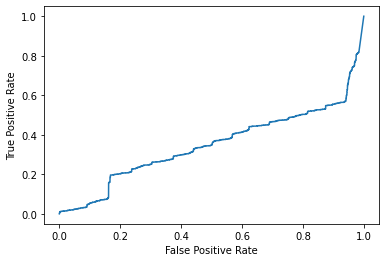

In [44]:
plt.figure()
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
